In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/garbage project/garbage dataset/Garbage classification/Garbage classification")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/garbage project/garbage dataset/Garbage classification/Garbage classification'

In [4]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
dir_path ="/content/gdrive/My Drive/Colab Notebooks/garbage project/garbage dataset/Garbage classification/Garbage classification"

In [6]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [7]:
len(img_list)

2529

In [8]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

In [9]:
test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

In [10]:
train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

Found 2278 images belonging to 6 classes.


In [11]:
test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

Found 251 images belonging to 6 classes.


In [12]:
labels = (train_generator.class_indices)
print(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [13]:
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 6))

In [15]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [16]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)            

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [19]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 
#41 epoch - 75% #73- 76.9%
#78 epoch - 80%

Epoch 1/100
71/71 [==============================] - 147s 2s/step - loss: 1.7304 - acc: 0.2400 - val_loss: 1.6327 - val_acc: 0.2991

Epoch 00001: val_acc improved from -inf to 0.29911, saving model to trained_model.h5
Epoch 2/100
71/71 [==============================] - 48s 680ms/step - loss: 1.5663 - acc: 0.3517 - val_loss: 1.5129 - val_acc: 0.3836

Epoch 00002: val_acc improved from 0.29911 to 0.38356, saving model to trained_model.h5
Epoch 3/100
71/71 [==============================] - 48s 673ms/step - loss: 1.4965 - acc: 0.3900 - val_loss: 1.5244 - val_acc: 0.4521

Epoch 00003: val_acc improved from 0.38356 to 0.45205, saving model to trained_model.h5
Epoch 4/100
71/71 [==============================] - 47s 659ms/step - loss: 1.3862 - acc: 0.4363 - val_loss: 1.3369 - val_acc: 0.4338

Epoch 00004: val_acc did not improve from 0.45205
Epoch 5/100
71/71 [==============================] - 47s 669ms/step - loss: 1.3172 - acc: 0.4871 - val_loss: 1.2893 - val_acc: 0.4703

Epoch 00005: val

Maximum Probability:  0.9663736
Classified: plastic


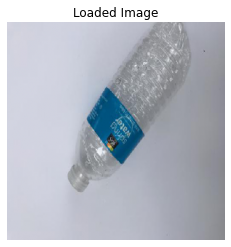

In [22]:
from keras.preprocessing import image

img_path = '/content/gdrive/My Drive/Colab Notebooks/garbage project/garbage dataset/Garbage classification/Garbage classification/plastic/plastic75.jpg'


img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.5 %
GLASS : 2.8 %
METAL : 0.01 %
PAPER : 0.05 %
PLASTIC : 96.64 %
TRASH : 0.0 %


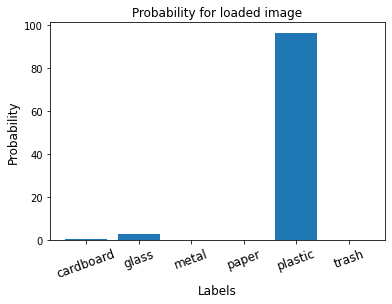

In [23]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

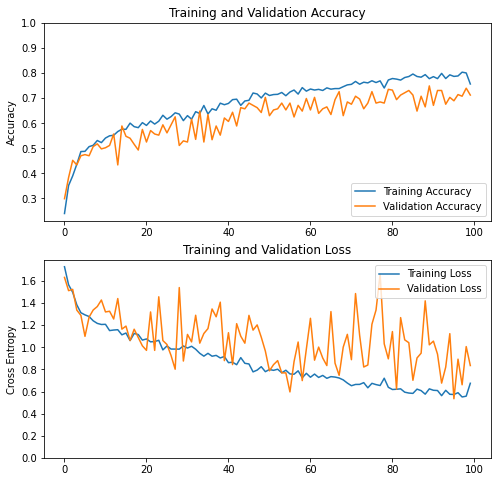

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [29]:
import tensorflow as tf
import keras

In [28]:
keras.models.save_model(model,'final_model.hdf5')

In [26]:
from IPython.display import FileLinks
FileLinks('.')

./
  labels.txt
  trained_model.h5
  waste_model.h5
./cardboard/
  cardboard55.jpg
  cardboard117.jpg
  cardboard342.jpg
  cardboard35.jpg
  cardboard137.jpg
  cardboard70.jpg
  cardboard214.jpg
  cardboard155.jpg
  cardboard101.jpg
  cardboard357.jpg
  cardboard185.jpg
  cardboard178.jpg
  cardboard105.jpg
  cardboard250.jpg
  cardboard395.jpg
  cardboard366.jpg
  cardboard66.jpg
  cardboard160.jpg
  cardboard296.jpg
  cardboard48.jpg
  cardboard102.jpg
  cardboard355.jpg
  cardboard234.jpg
  cardboard212.jpg
  cardboard295.jpg
  cardboard196.jpg
  cardboard390.jpg
  cardboard322.jpg
  cardboard351.jpg
  cardboard396.jpg
  cardboard6.jpg
  cardboard315.jpg
  cardboard335.jpg
  cardboard358.jpg
  cardboard197.jpg
  cardboard22.jpg
  cardboard140.jpg
  cardboard400.jpg
  cardboard228.jpg
  cardboard360.jpg
  cardboard184.jpg
  cardboard23.jpg
  cardboard317.jpg
  cardboard15.jpg
  cardboard207.jpg
  cardboard98.jpg
  cardboard293.jpg
  cardboard205.jpg
  cardboard191.jpg
  cardboard211.jpg
  cardboard31.jpg
  cardboard224.jpg
  cardboard200.jpg
  cardboard328.jpg
  cardboard348.jpg
  cardboard301.jpg
  cardboard156.jpg
  cardboard284.jpg
  cardboard183.jpg
  cardboard252.jpg
  cardboard112.jpg
  cardboard217.jpg
  cardboard136.jpg
  cardboard175.jpg
  cardboard286.jpg
  cardboard92.jpg
  cardboard349.jpg
  cardboard239.jpg
  cardboard38.jpg
  cardboard333.jpg
  cardboard254.jpg
  cardboard218.jpg
  cardboard274.jpg
  cardboard343.jpg
  cardboard109.jpg
  cardboard164.jpg
  cardboard209.jpg
  cardboard166.jpg
  cardboard152.jpg
  cardboard372.jpg
  cardboard282.jpg
  cardboard12.jpg
  cardboard158.jpg
  cardboard120.jpg
  cardboard291 (1).jpg
  cardboard14.jpg
  cardboard236.jpg
  cardboard334.jpg
  cardboard326.jpg
  cardboard382.jpg
  cardboard41.jpg
  cardboard246.jpg
  cardboard128.jpg
  cardboard89.jpg
  cardboard135.jpg
  cardboard279.jpg
  cardboard220.jpg
  cardboard39.jpg
  cardboard337.jpg
  cardboard216.jpg
  cardboard180.jpg
  cardboard316.jpg
  cardboard225.jpg
  cardboard116.jpg
  cardboard267.jpg
  cardboard106.jpg
  cardboard54.jpg
  cardboard347.jpg
  cardboard294.jpg
  cardboard276.jpg
  cardboard226.jpg
  cardboard298.jpg
  cardboard151.jpg
  cardboard394.jpg
  cardboard82.jpg
  cardboard285.jpg
  cardboard266.jpg
  cardboard350.jpg
  cardboard378.jpg
  cardboard68.jpg
  cardboard57.jpg
  cardboard397.jpg
  cardboard91.jpg
  cardboard114.jpg
  cardboard376.jpg
  cardboard9.jpg
  cardboard227.jpg
  cardboard336.jpg
  cardboard170.jpg
  cardboard148.jpg
  cardboard245.jpg
  cardboard240.jpg
  cardboard265.jpg
  cardboard176.jpg
  cardboard300.jpg
  cardboard181.jpg
  cardboard7.jpg
  cardboard242.jpg
  cardboard314.jpg
  cardboard17.jpg
  cardboard146.jpg
  cardboard277.jpg
  cardboard133.jpg
  cardboard259.jpg
  cardboard352.jpg
  cardboard161.jpg
  cardboard280.jpg
  cardboard383.jpg
  cardboard290.jpg
  cardboard81.jpg
  cardboard272.jpg
  cardboard186.jpg
  cardboard232.jpg
  cardboard177.jpg
  cardboard110.jpg
  cardboard45.jpg
  cardboard241.jpg
  cardboard262.jpg
  cardboard51.jpg
  cardboard49.jpg
  cardboard130.jpg
  cardboard190.jpg
  cardboard59.jpg
  cardboard40.jpg
  cardboard86.jpg
  cardboard210.jpg
  cardboard203.jpg
  cardboard305.jpg
  cardboard341.jpg
  cardboard237.jpg
  cardboard391.jpg
  cardboard94.jpg
  cardboard289.jpg
  cardboard327.jpg
  cardboard65.jpg
  cardboard165.jpg
  cardboard244.jpg
  cardboard324.jpg
  cardboard261.jpg
  cardboard44.jpg
  cardboard356.jpg
  cardboard319.jpg
  cardboard141.jpg
  cardboard107.jpg
  cardboard173.jpg
  cardboard1.jpg
  cardboard63.jpg
  cardboard393.jpg
  cardboard18.jpg
  cardboard83.jpg
  cardboard331.jpg
  cardboard42.jpg
  cardboard43.jpg
  cardboard283.jpg
  cardboard321.jpg
  cardboard362.jpg
  cardboard50.jpg
  cardboard363.jpg
  cardboard103.jpg
  cardboard126.jpg
  cardboard24.jpg
  cardboard401.jpg
  cardboard11.jpg
  cardboard309.jpg
  cardboard249.jpg
  cardboard229.jpg
  cardboard297.jpg
  cardboard292 (1).jpg
  cardboard169.jpg
  car